## Problem Set 2: Merging and regular expressions

**Total points (without extra credit)**: 30 

**Background on the policy context**: here, we're going to use two datasets to practice reshaping, merging, and regular expression patterns. Both datasets relate to the broader issue of which employers might be violating the rights of temporary guestworkers granted visas under the H-2A program. Here are some articles about potential exploitation of guestworkers by firms and inequality caused by minimal oversight:

- News media coverage of labor abuses of temporary guestworkers: https://www.buzzfeednews.com/article/kenbensinger/the-pushovers 
- GAO report on labor abuses of temporary guestworkers: https://www.gao.gov/products/gao-15-154

The following datasets are located in `pset2_inputdata` (need to unzip): 

- `jobs_clean`: a dataset of guestworker jobs posted by many employers, some of whom have been debarred (banned) from the program for labor abuses; others not debarred
- `debar`: a dataset of employers who committed violations of labor regulations meant to protect temporary guestworkers 


You can view a codebook here: https://docs.google.com/spreadsheets/d/1rF9GJEC8pPKxipD0TsoG9DVdqz3EJ-b-BHEtyioAX7I/edit?usp=sharing


In [9]:
## helpful packages
import pandas as pd
import numpy as np
import random
import re
import os

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
file_path = os.path.join(os.path.expanduser("~"), "Desktop", "QSS20", "PS2", "debar.csv")
debar = pd.read_csv(file_path)

# 1. Reshaping data (13 points total)

Load the following dataset stored in `pset2_inputdata`: `debar.csv`

This represents employers temporarily banned from hiring workers (debar.csv); call this `debar`


View the head()


In [11]:
debar.head()

,Name,"City, State",Violation,Duration,Start date,End date
0,J&J Harvesting,"Leads, ND",Failure to respond to audit (partial response),2 years,1/19/2014,1/18/2016
1,"Stahlman Apiaries, Inc","Selby, SD",Failure to respond to audit (partial response),1 year,2/19/2015,2/14/2016
2,Trust Nursery,"Pulaski, NY",Failure to respond to audit (partial response),1 year,3/21/2014,3/20/2015
3,Anton Fertilizer Inc.,"Dighton, KS",Failure to respond to audit (no response),2 years,3/30/2014,3/29/2016
4,"Great Plains Fluid Service, Inc.","Greensburg, KS",Failure to respond to audit (no response),2 years,3/30/2014,3/29/2016


## 1.1 (1 point)

Print the number of rows in `debar` versus the number of unique employer names (`Name`). Is there one row per employer or multiple rows for some employers?

In [14]:
debar.shape
debar["Name"].nunique()

(114, 6)

98

This inspection shows we have 114 rows but only 98 unique employers, therefore there must be multiple rows for some employers.

## 1.2 Investigating duplicated rows (2 points)

A. Create a new column in `debar`--`is_repeated`-- that tells us whether an employer (`Name`) is repeated > 1 times

*Hint*: there are multiple ways to solve this but some possibilities to get the list of names that are repeated are:
- Using value_counts() on the `Name` variable and extracting the index from that value counts 
- Using groupby to count the rows attached to one name

B. Print the rows where `is_repeated == True` and interpret

C. Subset to the rows where `is_repeated == True` and save that data as `mult_debar`. Print the head() and shape

In [95]:
# Use value_counts to count the occurrences of each employer
employer_counts = debar['Name'].value_counts()


# Create an "is_repeated" column in the DataFrame
debar['is_repeated'] = debar['Name'].map(lambda x: x in employer_counts[employer_counts > 1])

mult_debar = debar[debar['is_repeated']==True]

mult_debar.shape
mult_debar

(32, 7)

,Name,"City, State",Violation,Duration,Start date,End date,is_repeated
6,Annabella Land & Cattle,"Annabella, UT",Non Payment,1 year,5/9/2014,5/9/2015,True
7,Autumn Hill Orchard,"Groton, MA",Failure to respond to audit (no response),2 years,7/6/2014,7/5/2016,True
8,"Caddo Creek Ranch, dba Paradise Ranch","Caddo, TX",Failure to respond to audit (partial response),2 years,7/20/2014,7/19/2016,True
11,Loewen Harvesting LLC,"Brownsville, TX",Failure to respond to audit (partial response),1 year,8/20/2014,8/19/2015,True
12,Rollo Farm Labor Contractor,"Miami, FL",Failure to respond to audit (no response),2 years,8/23/2014,8/22/2016,True
14,Sharon Mathis,"Tifton, GA",Failure to respond to audit (no response),2 years,11/16/2014,11/15/2016,True
15,SRT Farms,"Morton, TX",Failure to respond to audit (no response),2 years,11/16/2014,11/15/2016,True
16,Mark Duncan,"Roosevelt, UT",Failure to respond to audit (no response),2 years,11/16/2014,11/15/2016,True
17,"Maple Ridge Custom Services, LLC","Altheimer, AK",Failure to respond to audit (partial response),2 years,11/16/2014,11/15/2016,True
18,F&W Farms,"Ingalls, KS",Failure to respond to audit (partial response),2 years,12/10/2014,12/9/2016,True


## 1.3 Reshape mult_debar to wide to begin filtering out duplicates (4 points)

You want to separate out two cases:

- Cases where the repeat rows for one employer are due to duplicated data 
- Cases where the repeat rows for one employer represent repeated violations for different issues

There are various ways to check duplicates in this data (eg converting `Violation` to lowercase; replacing spelled-out states with two-dig state codes)

We're going to use the simple rule of:

- A row is a duplicate if, within an employer (defined by Name + City, State), the Start date for each row's violation is the same 

To begin to check this, reshape `mult_debar` to a wide dataframe (`mult_debar_wide`) with the following columns, treating the `Name` and `City, State` as the index for the pivot:

- Name
- City, State
- start_date_viol1
- start_date_viol2

Print the head and shape

In [99]:
mult_debar['City, State'] = mult_debar['City, State'].replace('Texas', 'TX', regex=True)
mult_debar['City, State'] = mult_debar['City, State'].replace('Utah', 'UT', regex=True)
mult_debar['City, State'] = mult_debar['City, State'].replace('Altheimer, AK', 'Altheimer, AR', regex=True)
mult_debar['City, State'] = mult_debar['City, State'].replace('Georgia', 'GA', regex=True)
mult_debar['City, State'] = mult_debar['City, State'].replace('Brownfield, TX', 'Brownsville, TX', regex=True)

mult_debar = mult_debar.sort_values(by = "Start date")

mult_debar['start_date_viol1'] = mult_debar.groupby('Name')['Start date'].transform('first')
mult_debar['start_date_viol2'] = mult_debar.groupby('Name')['Start date'].transform(lambda x: x.iloc[1] if len(x) > 1 else None)

mult_debar.head()
mult_debar.shape

,Name,"City, State",Violation,Duration,Start date,End date,is_repeated,start_date_viol1,start_date_viol2
59,"Maple Ridge Custom Services, LLC","Altheimer, AR",Impeding the Audit Process – Partial- Response,1 year,11/16/2014,11/15/2015,True,11/16/2014,11/16/2014
60,Mark Duncan,"Roosevelt, UT",Impeding the Audit Process – Non- Response,2 years,11/16/2014,11/15/2016,True,11/16/2014,11/16/2014
62,Sharon Mathis,"Tifton, GA",Impeding the Audit Process – Non- Response,2 years,11/16/2014,11/15/2016,True,11/16/2014,11/16/2014
14,Sharon Mathis,"Tifton, GA",Failure to respond to audit (no response),2 years,11/16/2014,11/15/2016,True,11/16/2014,11/16/2014
15,SRT Farms,"Morton, TX",Failure to respond to audit (no response),2 years,11/16/2014,11/15/2016,True,11/16/2014,11/16/2014


(32, 9)

In [100]:
# Pivot the DataFrame to create mult_debar_wide
mult_debar_wide = pd.pivot_table(mult_debar, index=['Name', 'City, State'],
                                         values=['start_date_viol1', 'start_date_viol2'],
                                         aggfunc='first').reset_index()


# Print the head and shape of the resulting DataFrame
print(mult_debar_wide.head())
print(mult_debar_wide.shape)
mult_debar_wide

                                    Name       City, State start_date_viol1  \
0                Annabella Land & Cattle     Annabella, UT         5/9/2014   
1                    Autumn Hill Orchard        Groton, MA         7/6/2014   
2  Caddo Creek Ranch, dba Paradise Ranch         Caddo, TX        7/20/2014   
3                     Cisco Produce Inc.         Cairo, GA       12/10/2014   
4                       Dove Creek Farms  Mount Vernon, TX         2/9/2018   

  start_date_viol2  
0         5/9/2014  
1         7/6/2014  
2        7/20/2014  
3       12/10/2015  
4         2/9/2018  
(16, 4)


,Name,"City, State",start_date_viol1,start_date_viol2
0,Annabella Land & Cattle,"Annabella, UT",5/9/2014,5/9/2014
1,Autumn Hill Orchard,"Groton, MA",7/6/2014,7/6/2014
2,"Caddo Creek Ranch, dba Paradise Ranch","Caddo, TX",7/20/2014,7/20/2014
3,Cisco Produce Inc.,"Cairo, GA",12/10/2014,12/10/2015
4,Dove Creek Farms,"Mount Vernon, TX",2/9/2018,2/9/2018
5,F&W Farms,"Ingalls, KS",12/10/2014,12/10/2014
6,Loewen Harvesting LLC,"Brownsville, TX",8/20/2014,8/20/2014
7,Macky and Brad Farms,"Plains, TX",2/13/2015,2/13/2015
8,"Maple Ridge Custom Services, LLC","Altheimer, AR",11/16/2014,11/16/2014
9,Mark Duncan,"Roosevelt, UT",11/16/2014,11/16/2014


## 1.4 Filter out duplicates from original debar data (6 points)

A. Using `mult_debar_wide`, add a column `is_dup` that takes value of True for cases where start_date_viol1 == start_date_viol2 marking the row as a duplicate

B. Going back to the original long-format data you loaded at the beginning- `debar`
    - For employers where `is_dup == True` as indicated by your wide-format dataframe, only keep `violnum == viol1`
    - For all other employers (so is_dup == False and ones we didnt need to check duplicates for), keep all violnum
    - Remove the `is_repeated` column from the `debar` data

**Hint**: you can complete part B without a for loop; `pd.concat` with axis = 0 (row binding) is one way

Call the resulting dataframe `debar_clean` and print the shape and # of unique employer names

In [101]:
mult_debar_wide["is_dup"] = np.where(mult_debar_wide["start_date_viol1"]==mult_debar_wide["start_date_viol2"], True, False)

mult_debar_wide.shape
debar.shape

(16, 5)

(114, 7)

In [102]:
mult_debar_wide_dups = mult_debar_wide[mult_debar_wide["is_dup"]==True]
mult_debar_wide_dupsnew = mult_debar_wide_dups.drop_duplicates(subset="Name", keep="first")

mult_debar_wide_nondups = mult_debar_wide[mult_debar_wide["is_dup"]==False]

mult_debar_wide_clean = mult_debar_wide_dupsnew.merge(mult_debar_wide_nondups, how="outer", on=["Name", "City, State", "start_date_viol1", "start_date_viol2", "is_dup"])
mult_debar_wide_clean
mult_debar_wide


,Name,"City, State",start_date_viol1,start_date_viol2,is_dup
0,Annabella Land & Cattle,"Annabella, UT",5/9/2014,5/9/2014,True
1,Autumn Hill Orchard,"Groton, MA",7/6/2014,7/6/2014,True
2,"Caddo Creek Ranch, dba Paradise Ranch","Caddo, TX",7/20/2014,7/20/2014,True
3,Dove Creek Farms,"Mount Vernon, TX",2/9/2018,2/9/2018,True
4,F&W Farms,"Ingalls, KS",12/10/2014,12/10/2014,True
5,Loewen Harvesting LLC,"Brownsville, TX",8/20/2014,8/20/2014,True
6,Macky and Brad Farms,"Plains, TX",2/13/2015,2/13/2015,True
7,"Maple Ridge Custom Services, LLC","Altheimer, AR",11/16/2014,11/16/2014,True
8,Mark Duncan,"Roosevelt, UT",11/16/2014,11/16/2014,True
9,Rollo Farm Labor Contractor,"Miami, FL",8/23/2014,8/23/2014,True


,Name,"City, State",start_date_viol1,start_date_viol2,is_dup
0,Annabella Land & Cattle,"Annabella, UT",5/9/2014,5/9/2014,True
1,Autumn Hill Orchard,"Groton, MA",7/6/2014,7/6/2014,True
2,"Caddo Creek Ranch, dba Paradise Ranch","Caddo, TX",7/20/2014,7/20/2014,True
3,Cisco Produce Inc.,"Cairo, GA",12/10/2014,12/10/2015,False
4,Dove Creek Farms,"Mount Vernon, TX",2/9/2018,2/9/2018,True
5,F&W Farms,"Ingalls, KS",12/10/2014,12/10/2014,True
6,Loewen Harvesting LLC,"Brownsville, TX",8/20/2014,8/20/2014,True
7,Macky and Brad Farms,"Plains, TX",2/13/2015,2/13/2015,True
8,"Maple Ridge Custom Services, LLC","Altheimer, AR",11/16/2014,11/16/2014,True
9,Mark Duncan,"Roosevelt, UT",11/16/2014,11/16/2014,True


In [ ]:

dups = mult_debar_wide[mult_debar_wide["is_dup"]==True]
uniquedups = dups["Name"].unique()
uniquedupslist = list(uniquedups)
print(uniquedupslist)

for employer in debar.Name
    if employer is in uniquedupslist
       remove second violation

In [112]:
debar_clean = debar.merge(mult_debar_wide, how='outer', left_on=["Name", "City, State", 'Start date'], right_on=["Name", "City, State", 'start_date_viol2'])
debar_clean = debar_clean.drop_duplicates(subset="Name", keep="first")


debar_clean

,Name,"City, State",Violation,Duration,Start date,End date,is_repeated,start_date_viol1,start_date_viol2,is_dup
0,J&J Harvesting,"Leads, ND",Failure to respond to audit (partial response),2 years,1/19/2014,1/18/2016,False,NaN,NaN,NaN
1,"Stahlman Apiaries, Inc","Selby, SD",Failure to respond to audit (partial response),1 year,2/19/2015,2/14/2016,False,NaN,NaN,NaN
2,Trust Nursery,"Pulaski, NY",Failure to respond to audit (partial response),1 year,3/21/2014,3/20/2015,False,NaN,NaN,NaN
3,Anton Fertilizer Inc.,"Dighton, KS",Failure to respond to audit (no response),2 years,3/30/2014,3/29/2016,False,NaN,NaN,NaN
4,"Great Plains Fluid Service, Inc.","Greensburg, KS",Failure to respond to audit (no response),2 years,3/30/2014,3/29/2016,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
109,Walker Place,"Danville, IL",Failure to comply with the employer's obligati...,2 months,11/19/2019,1/26/2020,False,NaN,NaN,NaN
110,County Fair Farm (company) and Andrew Williams...,"Jefferson, ME",WHD Debarment,3 years,3/8/2017,3/8/2020,False,NaN,NaN,NaN
111,Jesus Ledesma,"Mulberry, FL",Failure to Respond to Audit Request,2 years,2/8/18,2/8/20,False,NaN,NaN,NaN
112,B & R Harvesting and Paul Cruz (individual),"Collins, Georgia",WHD Debarment,3 years,4/9/17,4/9/20,False,NaN,NaN,NaN


# 2. Merging and regex (17 points total)



## 2.1 Load data on job postings

The previous dataset contains a small subset of employers who faced temporary bans due to violations of H-2A program regulations

Since most of the bans have expired, we're going to see which of those employers posted new H-2A jobs in the first quarter of 2021 

Loading the `jobs_clean.csv` data stored in `pset4_inputdata`

In [ ]:
# your code here to load the data 



##  2.2 Try inner join on employer name  (2 points)

- Use the `EMPLOYER_NAME` field of the `jobs` dataset
- Use the `Name` field of the `debar_clean` dataset 

A. Use pd.merge with an inner join on those fields to see whether there are any exact matches. 

B. If there are exact matches, print the row(s) with exact matches



In [ ]:
## your code here

## 2.3 Targeted regex (10 points total)

You want to see if you can increase the exact match rate with some basic cleaning of each 
of the employer name fields in each dataset 

### 2.3.1 Converting to upper (2 points)

A. Convert the `EMPLOYER_NAME` and `Name` fields to uppercase using list comprehension rather than df.varname.str.upper() (it's fine to do a separate list comprehension line for each of the two columns)

B. Print a random sample of 15 values of each result

C. Assign the full vector of uppercase names back to the original data, writing over the original `EMPLOYER_NAME` and `Name` columns 


In [ ]:
## insert your code to turn into uppercase here


In [ ]:
## insert your code for the random sample

In [ ]:
## insert your code for assigning the uppercase names back to the data

### 2.3.2 Cleaning up punctuation (4 points)

You notice that INC, CO, and LLC are sometimes followed by a period (.) but sometimes not

A. For each dataset, write a regex pattern using `re.sub` to remove the . but only if it's preceded by INC, LLC, or CO 

Make sure LLC, INC, CO remain part of the string but just without the dot

B. Test the pattern on the positive and negative example we provide below and print the result. See the Github issue for examples of what to return


**Hint**: https://stackoverflow.com/questions/7191209/python-re-sub-replace-with-matched-content



In [ ]:
pos_example_1 = "CISCO PRODUCE INC."
pos_example_2 = "AVOYELLES HONEY CO., LLC"
neg_example = "E.V. RANCH LLP"

In [ ]:
## insert your code here with the regex pattern for part A

## insert your code to use re.sub to apply the pattern to the test cases for part B

### 2.3.3 (4 points)

Use that pattern in conjunction with `re.sub` and list comprehension to clean the employer name columns in each dataset. Save the new columns as `name_clean` in each. Then, use row subsetting to (1) subset to rows that changed names and (2) for:

- `debar_clean` print the `Name` and `name_clean` columns
- `jobs` print the `EMPLOYER_NAME` and `name_clean` columns

Make sure to use the uppercase versions of the variables


In [ ]:
## your code here to clean the columns

In [ ]:
## your code here to print the head

## 2.4 More joins and more cleaning (5 points)

A. Conduct another inner join between `jobs` and `debar_clean` now using the `name_clean` column; print the result. Did the cleaning result in any more employers matched between the two datasets?

B. Create a new column in `debar_clean` called `name_clean_2` that uses regex to take the following name in that dataset:

- `SLASH E.V. RANCH LLP` in the `debar_clean` dataset

And cleans it up so that it matches with this employer in `jobs`

- `SLASH EV RANCH` in the `jobs` dataset

Eg a pattern to remove the dots in the EV and the space+LLP-- you can apply the pattern to all employer names in debar_clean (so don't need to worry about only applying it to that one employer)


C. Conduct a left join using `name_clean_2` as the join column where the left hand dataframe is `jobs`; right hand dataframe is `debar_clean`, store the result as a dataframe, and print the rows where the merge indicator indicates the row was found in both dataframe

**Note**: this manual cleaning process is inefficient and helps motivate why talked about fuzzy matching. Fuzzy matching could recognize that Slash EV ranch is a highly similar string to slash ev ranch llp and match them without us needing to use regex to make the strings identical.

In [ ]:
## your code here

# 3. Optional extra credit 1: regex to separate companies from individuals (1 point)

You notice some employers in `debar_clean` have both the name of the company and the name of individual, e.g.:
    
COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMSON (INDIVIDUAL)*

Use the uppercase/cleaned `name_clean` in `debar_clean`

A. Write a regex pattern that does the following:
    - Captures the pattern that occurs before COMPANY if (COMPANY) is in string; so in example above, extracts COUNTY FAIR FARM 
    - Captures the pattern that occurs before INDIVIDUAL if (INDIVIDUAL) is also in string -- so in above, extracts ANDREW WILLIAMSON (so omit the "and")
    
B. Test the pattern on `pos_example` and `neg_example`-- make sure former returns a list (if using find.all) or match object (if using re.search) with the company name and individual name separated out; make sure latter returns empty
    
**Hints and resources**: for step A, you can either use re.search, re.match, or re.findall; don't worry about matching B&R Harvesting and Paul Cruz (Individual)

- Same regex resources as above
    

In [ ]:
pos_example = "COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMSON (INDIVIDUAL)*"
neg_example = "CISCO PRODUCE INC"

## your code here to define the pattern

## your code here to apply it to the pos_example

## your code here to apply it to the negative example

C. Iterate over the `name_clean` column in debar and use regex to create two new columns in `debar_clean`:
   - `co_name`: A column for company (full `name_clean` string if no match; pattern before COMPANY if one extracted)
   - `ind_name`: A column for individual (full `name_clean` string if no match; pattern before INDIVIDUAL if one extracted)
 


In [ ]:
# your code here

   
D. Print three columns for the rows in `debar_clean` containing the negative example and positive example described above (county fair farm and cisco produce):

- `name_clean`
- `co_name`
- `ind_name`
- `Violation`

**Note**: as shown in the outcome there may be duplicates of the same company reflecting different violations

In [ ]:
# your code here

# 4. Optional extra credit 2 (up to 3 points)

- For 1 point extra credit, create a visualization with 1+ of the existing fields in either the raw `jobs` or `debar` data. We'll be showing cool visualizations in class so use your imagination! Options could include visualizing between-state or over-time variation

- For 3 points extra credit instead, geocode the employer addresses in `jobs` and plot the addresses of jobs as points overlaid on top of a map of Georgia 
    - **Note**: this extra credit involves Googling since we have not yet covered spatial data. 
        - For discussion of how to geocode addresses -> lat/long, see: https://www.natasshaselvaraj.com/a-step-by-step-guide-on-geocoding-in-python/ 
        - For discussion of plotting lat/long dots against a map, see this discussion of geopandas: https://towardsdatascience.com/plotting-maps-with-geopandas-428c97295a73
    - Relevant columns include `EMPLOYER_ADDRESS_1` 
    - The geocoding might have a long runtime so feel free to implement it in a separate .py script that you submit alongside your notebook and to just read in the geocoded data

<BarContainer object of 18 artists>

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Value Counts Bar Plot')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Impeding the Audit Process – Non- Response'),
  Text(1, 0, 'Failure to respond to audit request'),
  Text(2, 0, 'Failure to respond to audit (no response)'),
  Text(3, 0, 'Failure to respond to audit (partial response)'),
  Text(4, 0, 'Non-payment of certification fee'),
  Text(5, 0, 'WHD Debarment'),
  Text(6, 0, 'Non-payment'),
  Text(7, 0, "Failure to comply with the employer's obligations to recruit U.S. workers"),
  Text(8, 0, 'Impeding the Audit Process – Partial- Response'),
  Text(9, 0, 'WHD referral'),
  Text(10, 0, 'Wage Hour Debarment'),
  Text(11, 0, 'Impeding the Audit Process – Partial Response;'),
  Text(12, 0, 'Non Payment'),
  Text(13, 0, 'Failure to Respond to Audit Request'),
  Text(14, 0, 'Non-Payment'),
  Text(15, 0, 'A violation of the requirements of § 655.135(j) or (k)'),
  Text(16, 0, 'Failure to pay or provide the required wages'),
  Text(17, 0, 'Failure to Hire U.S. workers')])

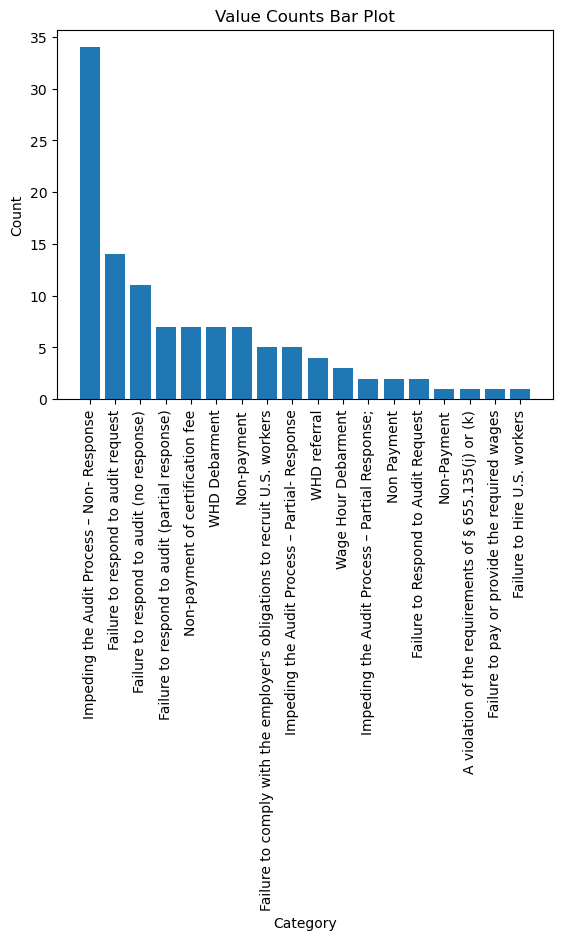

In [115]:
import matplotlib.pyplot as plt

# Calculate the value counts
value_counts = debar['Violation'].value_counts()

# Create a bar plot
plt.bar(value_counts.index, value_counts.values)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Value Counts Bar Plot')
plt.xticks(rotation=90)

# Show the plot
plt.show()